In [1]:
# PREPARING TRAINING DATA

from DataPreparation import prepare_dataset
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load data
train_data, train_labels, val_data, val_labels, test_data, test_labels = prepare_dataset('./data')

# Label encoding
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)  # use transform, not fit_transform here!
test_labels = label_encoder.transform(test_labels)

# One-hot encoding
train_labels = to_categorical(train_labels, num_classes=4)
val_labels = to_categorical(val_labels, num_classes=4)
test_labels = to_categorical(test_labels, num_classes=4)


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from Model import create_cnn_model_2 

model = create_cnn_model_2(train_data)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, verbose=1, validation_data=(val_data, val_labels))

c:\Users\Chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.2308 - loss: 1.4185 - val_accuracy: 0.2789 - val_loss: 1.3860
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.3006 - loss: 1.3656 - val_accuracy: 0.5468 - val_loss: 0.9933
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.5590 - loss: 0.9167 - val_accuracy: 0.6580 - val_loss: 0.8034
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.6573 - loss: 0.7286 - val_accuracy: 0.7190 - val_loss: 0.6624
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.7404 - loss: 0.5917 - val_accuracy: 0.7647 - val_loss: 0.5483
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8053 - loss: 0.4804 - val_accuracy: 0.7865 - val_loss: 0.5060
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8292 - loss: 0.3898 - val_accuracy: 0.8519 - val_loss: 0.3984
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8868 - loss: 0.2985 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 171, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 83, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 39, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34048)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,358,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,354,382 (50.94 MB)

 Trainable params: 4,451,460 (16.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,902,922 (33.96 MB)

15/15 - 0s - 23ms/step - accuracy: 0.9847 - loss: 0.0384


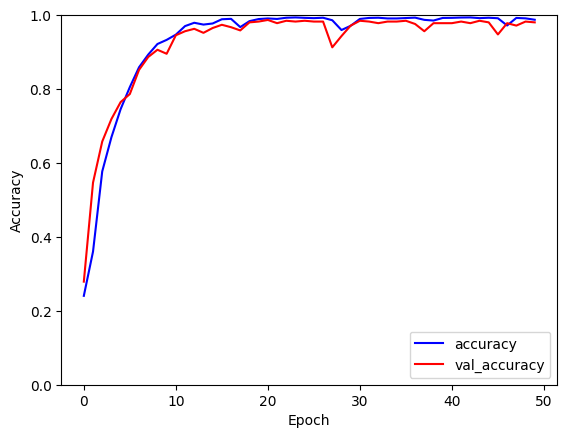

In [3]:
import numpy as np
import matplotlib.pylab as plt

model.summary()
plt.plot(history.history['accuracy'], label='accuracy', color="blue")
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color="red")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)